In [1]:
import numpy
import os
from scipy.misc import toimage
%matplotlib inline
from IPython.display import Image
feature_path = "../../featuremaps"

In [2]:
os.listdir(feature_path)

['.DS_Store',
 'b1c1.png',
 'b1c1_0.png',
 'b1c1_1.png',
 'b1c1_10.png',
 'b1c1_100.png',
 'b1c1_101.png',
 'b1c1_102.png',
 'b1c1_103.png',
 'b1c1_104.png',
 'b1c1_105.png',
 'b1c1_106.png',
 'b1c1_107.png',
 'b1c1_108.png',
 'b1c1_109.png',
 'b1c1_11.png',
 'b1c1_110.png',
 'b1c1_111.png',
 'b1c1_112.png',
 'b1c1_113.png',
 'b1c1_114.png',
 'b1c1_115.png',
 'b1c1_116.png',
 'b1c1_117.png',
 'b1c1_118.png',
 'b1c1_119.png',
 'b1c1_12.png',
 'b1c1_120.png',
 'b1c1_121.png',
 'b1c1_122.png',
 'b1c1_123.png',
 'b1c1_124.png',
 'b1c1_125.png',
 'b1c1_126.png',
 'b1c1_127.png',
 'b1c1_128.png',
 'b1c1_129.png',
 'b1c1_13.png',
 'b1c1_130.png',
 'b1c1_131.png',
 'b1c1_132.png',
 'b1c1_133.png',
 'b1c1_134.png',
 'b1c1_135.png',
 'b1c1_136.png',
 'b1c1_137.png',
 'b1c1_138.png',
 'b1c1_139.png',
 'b1c1_14.png',
 'b1c1_140.png',
 'b1c1_141.png',
 'b1c1_142.png',
 'b1c1_143.png',
 'b1c1_144.png',
 'b1c1_145.png',
 'b1c1_146.png',
 'b1c1_147.png',
 'b1c1_148.png',
 'b1c1_149.png',
 'b1c1_15.png

In [3]:
data = numpy.load('../../featuremaps/data.npy')

In [4]:
image = data[0][0].astype(numpy.uint8)
image = numpy.abs(image)
image = 100*image#/numpy.max(image)
image = numpy.clip(image, a_min=5, a_max=255)
high = 3600
low = 5200
print "Total: ", numpy.min(image), numpy.max(image)
print " High: ", numpy.min(image[:,:high,:]), numpy.max(image[:,:high,:]) 
print " Low: ", numpy.min(image[:,low:,:]), numpy.max(image[:,low:,:]) 

Total:  5 252
 High:  5 244
 Low:  5 200


In [5]:
toimage(image[:,high:low,:]).save('../../featuremaps/data.png')

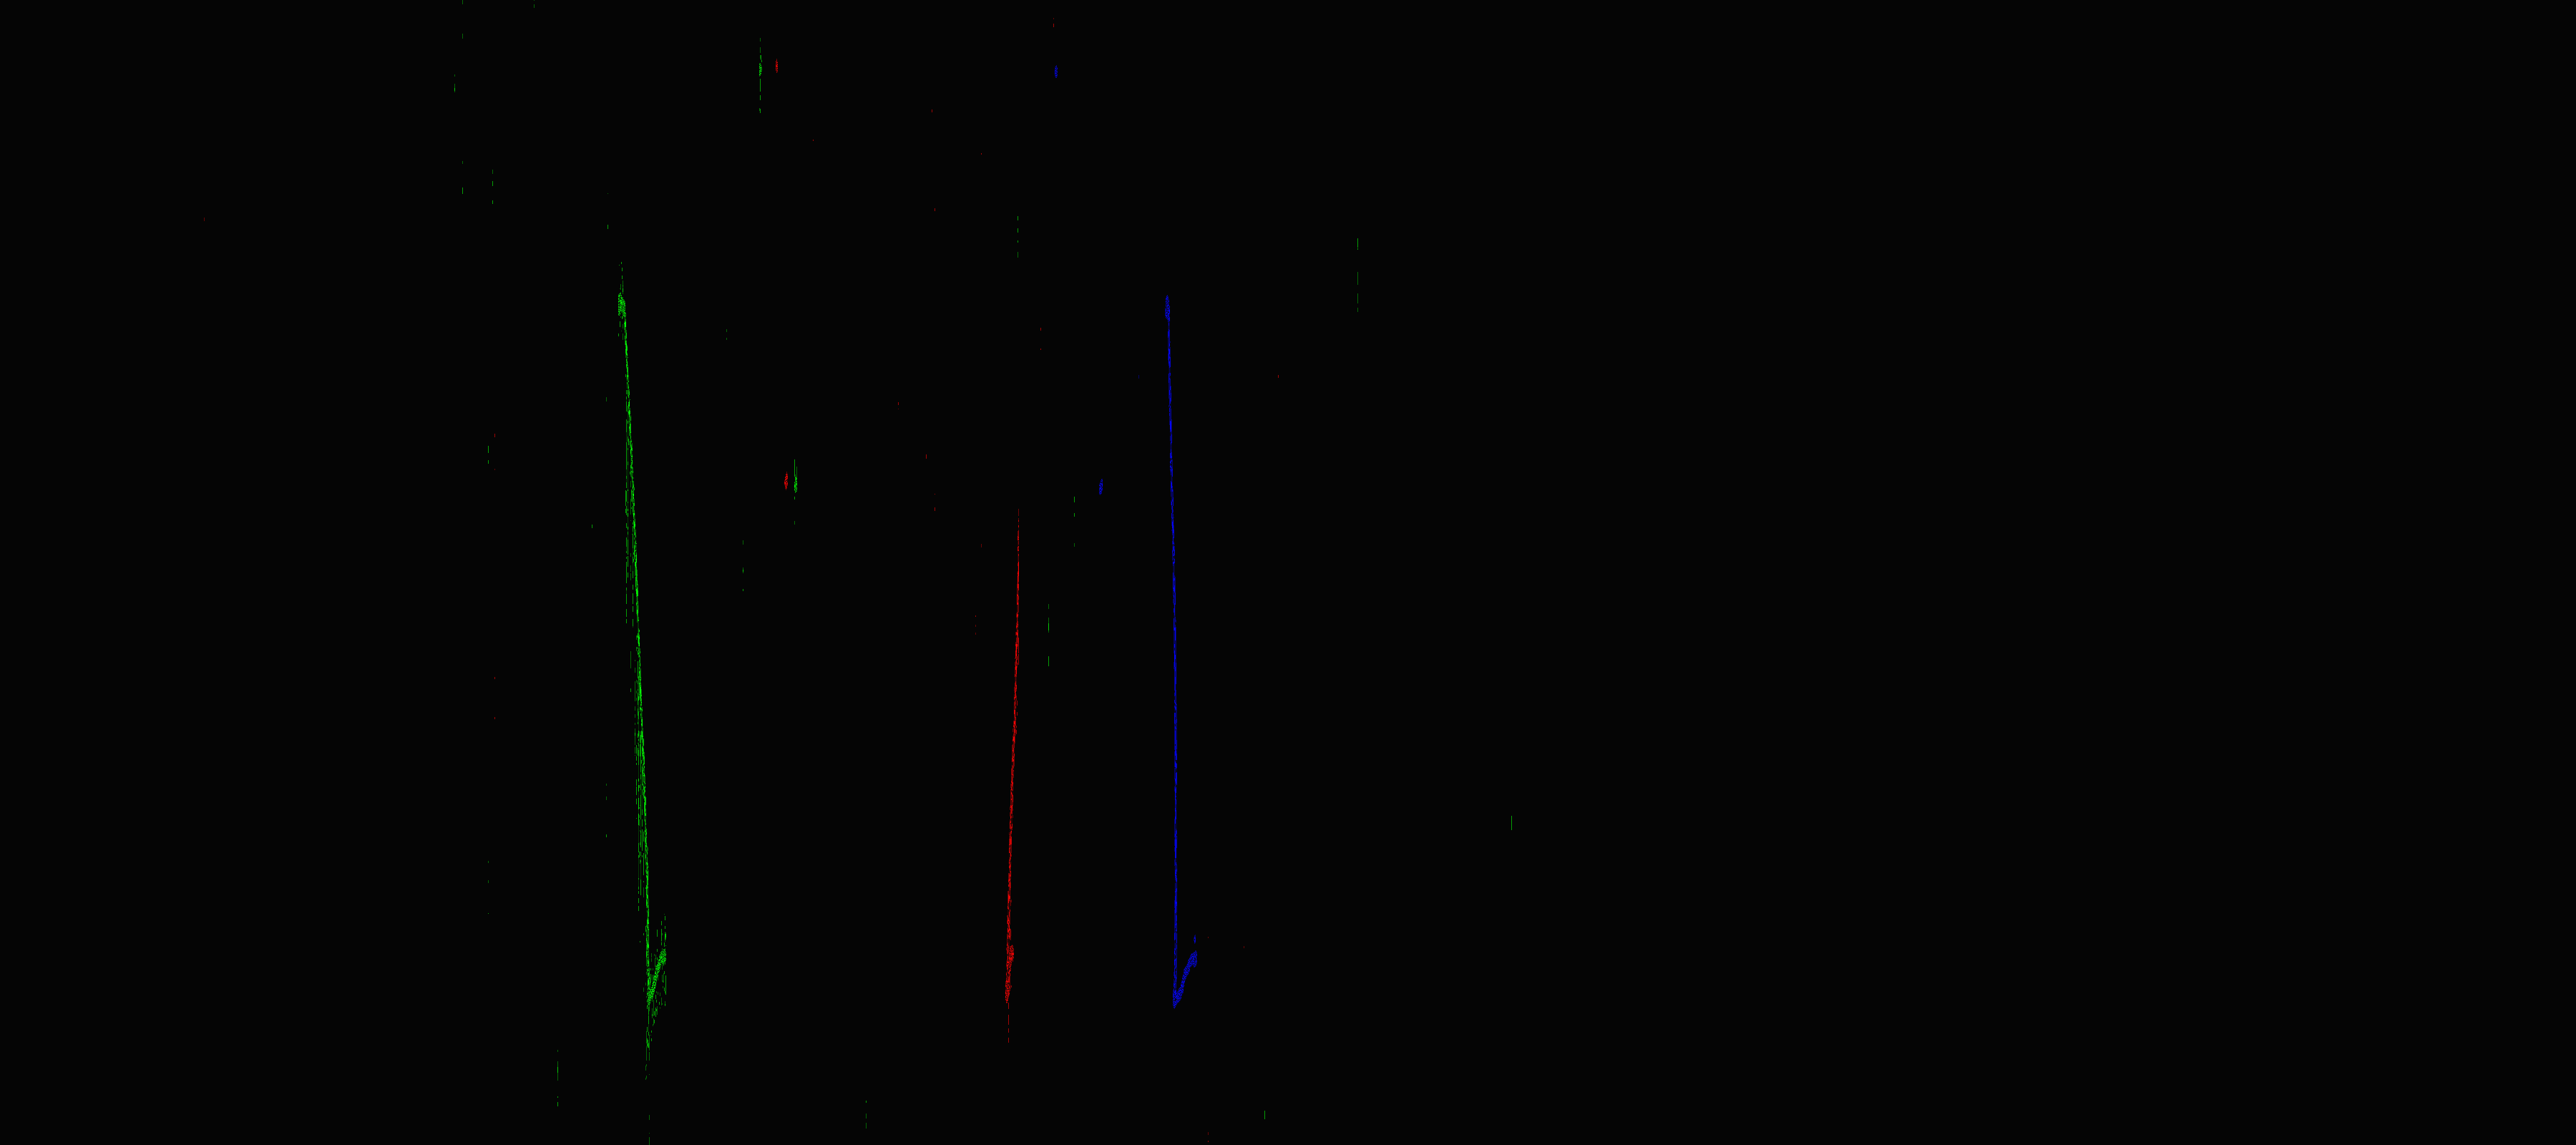

In [6]:
Image('../../featuremaps/data.png')

## First Convolutional layer

In [7]:
data = numpy.load('../../featuremaps/block1_conv1.npy')[0]
print data.shape

(32, 3, 2400, 900)


In [8]:
border=2
n_wide=8
n_tall = len(data)/n_wide
width=(n_wide)*(data[0].shape[1])+border*(n_wide+1)
height= (n_tall)*(data[0].shape[2])+border*(n_tall+1)
big_image = numpy.ndarray(shape=(3,width,height ), dtype=numpy.uint8)
big_image = big_image+255
print "Big Image Shape: ", big_image.shape
print "Small Image Shape:", data[0].shape

for index, image in enumerate(data):
    image = numpy.abs(image)
    image = 255*image#/numpy.max(image)
    image = numpy.clip(image,0,255)
    toimage(image.astype(numpy.uint8)).save('../../featuremaps/b1c1_{}.png'.format(index))
    x_position = index%n_wide
    y_position = index/n_wide
    
    left_edge = border*(x_position+1)+image.shape[1]*x_position
    upper_edge = border*(y_position+1)+image.shape[2]*y_position
    big_image[:,
              left_edge:left_edge+image.shape[1],
              upper_edge:upper_edge+image.shape[2]] = image
toimage(big_image).save('../../featuremaps/b1c1.png')

Big Image Shape:  (3, 19218, 3610)
Small Image Shape: (3, 2400, 900)


In [9]:
Image('../../featuremaps/b1c1.png')

## Second Convolutional Layer

In [10]:
data = numpy.load('../../featuremaps/block2_conv1.npy')[0].astype(numpy.uint8)

In [11]:
border=2
n_wide=8
n_tall = len(data)/n_wide
width=(n_wide)*(data[0].shape[1])+border*(n_wide+1)
height= (n_tall)*(data[0].shape[2])+border*(n_tall+1)
big_image = numpy.ndarray(shape=(3,width,height ), dtype=numpy.uint8)
big_image = big_image+255
print "Big Image Shape: ", big_image.shape
print "Small Image Shape:", data[0].shape

for index, image in enumerate(data):
    image = numpy.abs(image)
    image = 255*image#/numpy.max(image)
    image = numpy.clip(image,0,255)
    toimage(image.astype(numpy.uint8)).save('../../featuremaps/b2c1_{}.png'.format(index))
    x_position = index%n_wide
    y_position = index/n_wide
    
    left_edge = border*(x_position+1)+image.shape[1]*x_position
    upper_edge = border*(y_position+1)+image.shape[2]*y_position
    big_image[:,
              left_edge:left_edge+image.shape[1],
              upper_edge:upper_edge+image.shape[2]] = image
toimage(big_image).save('../../featuremaps/b2c1.png')

Big Image Shape:  (3, 2418, 1818)
Small Image Shape: (3, 300, 225)


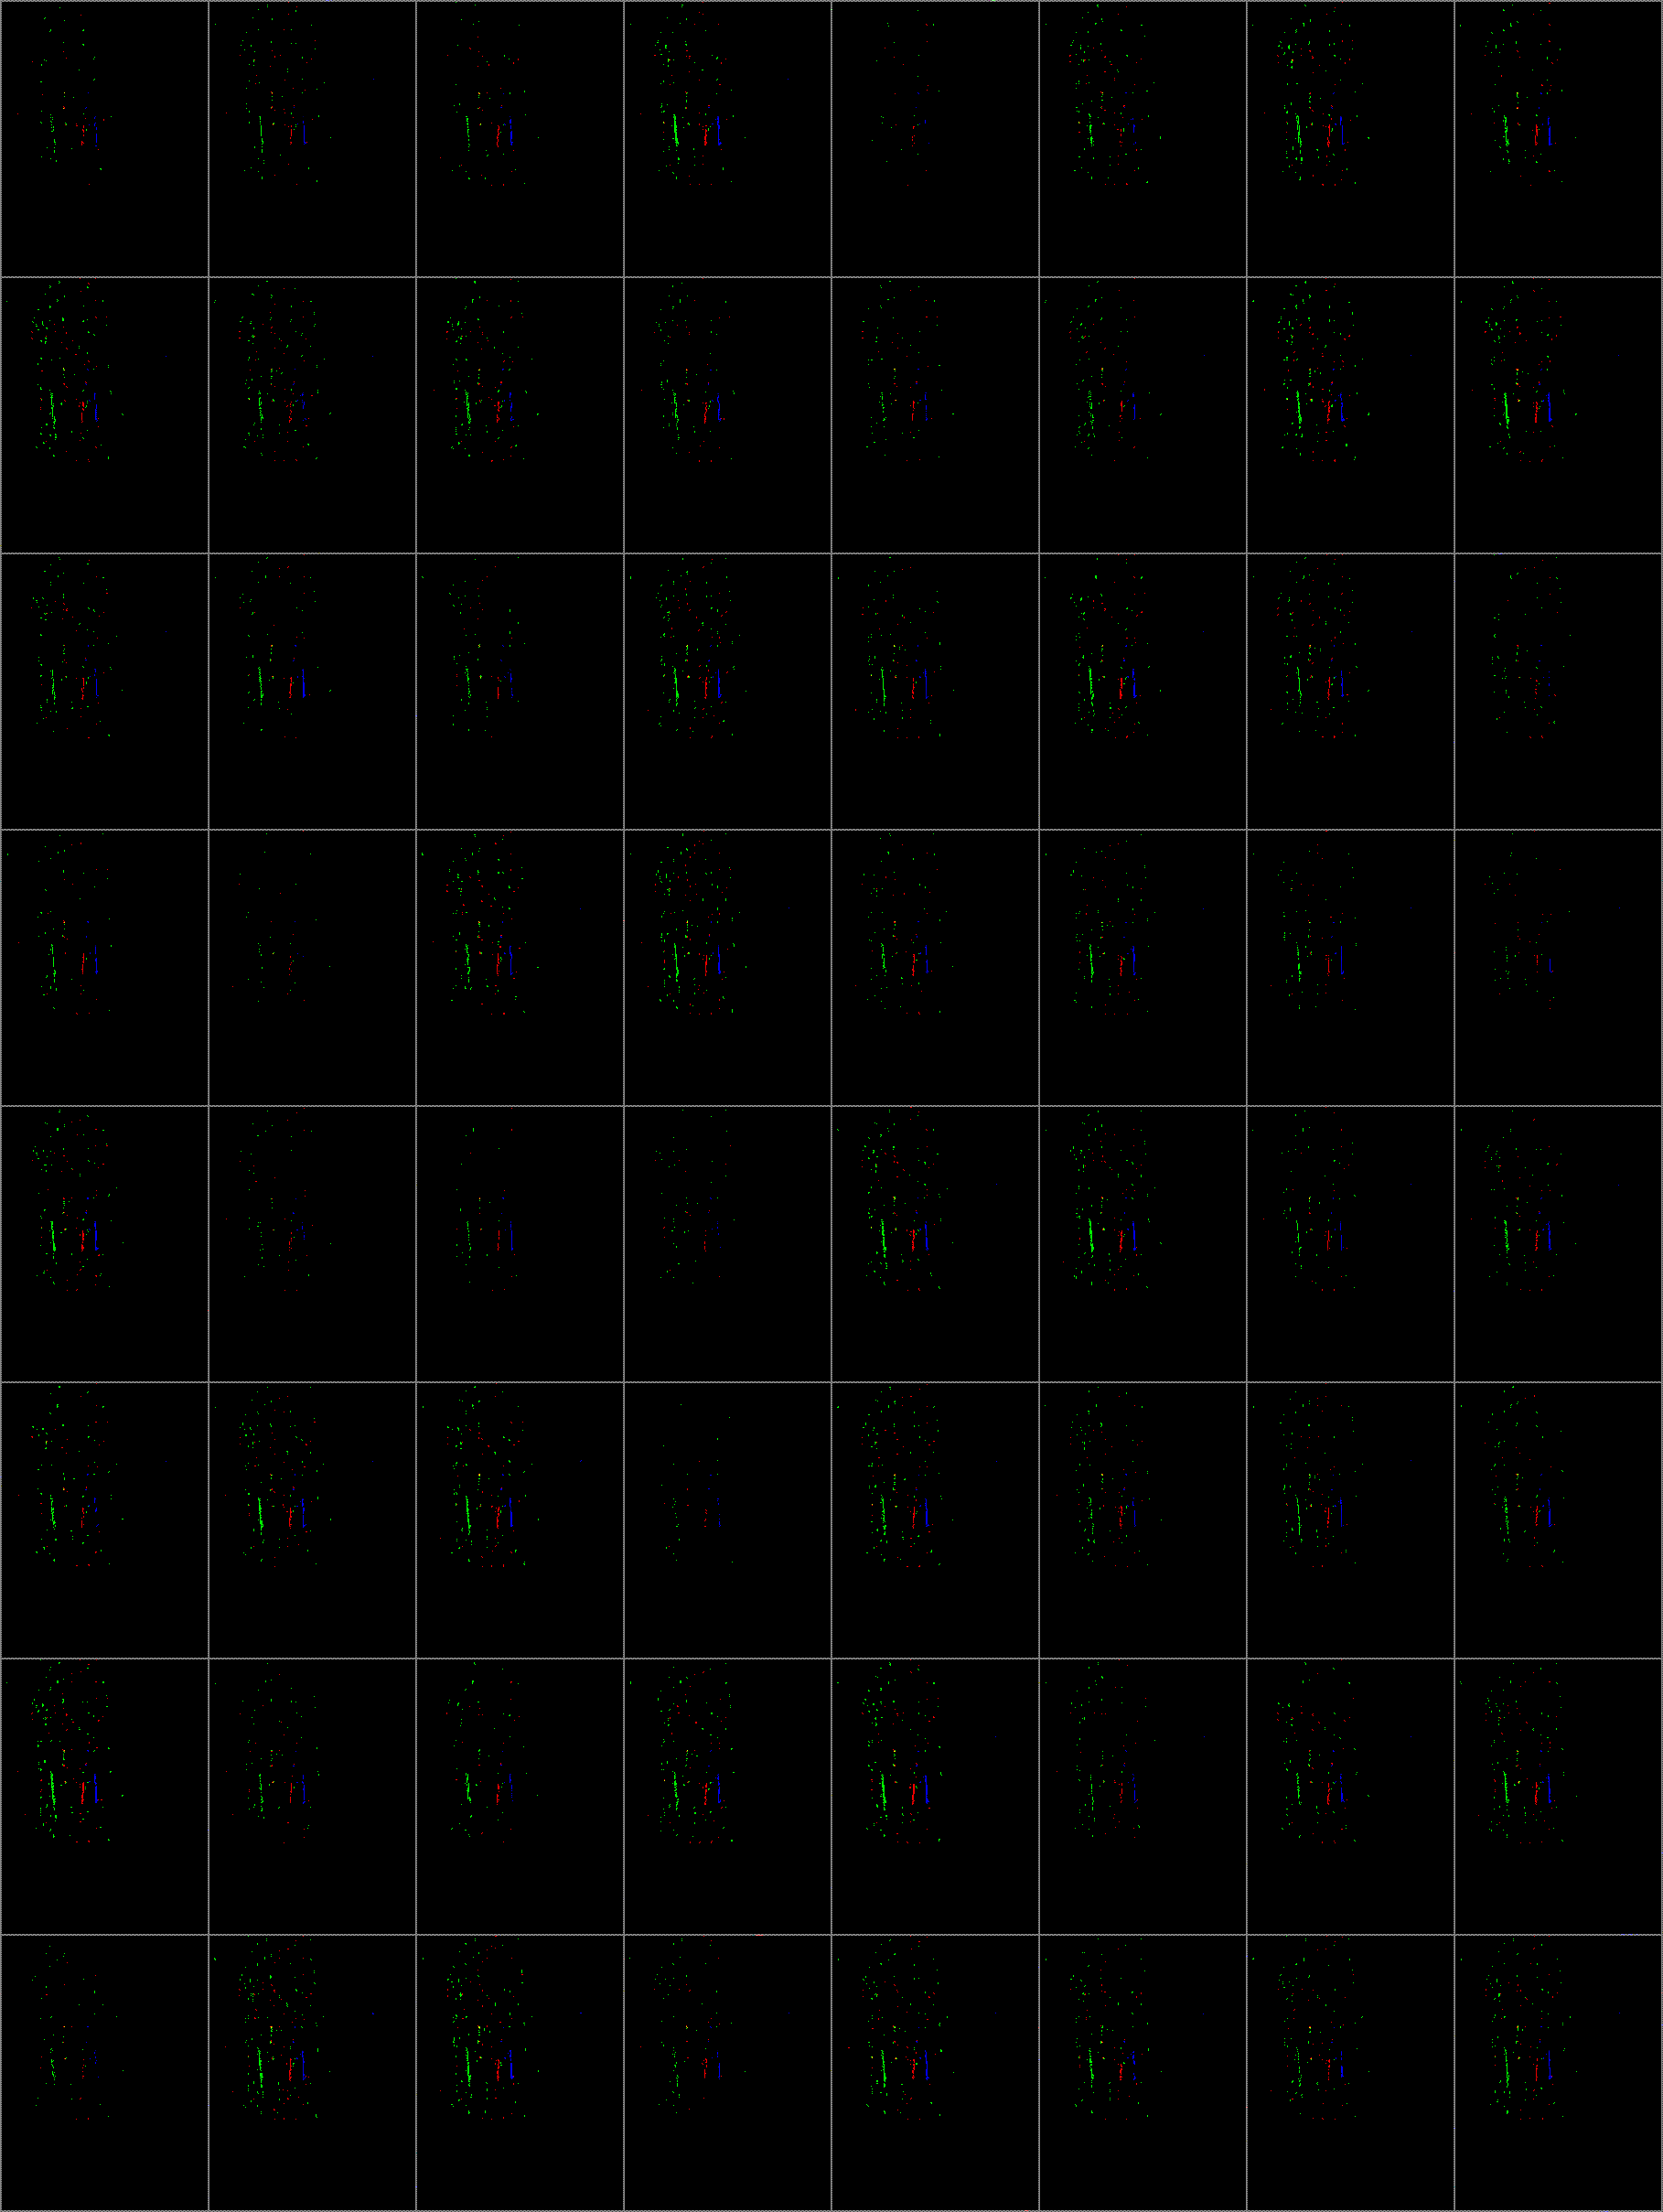

In [12]:
Image('../../featuremaps/b2c1.png')

In [13]:
data = numpy.load('../../featuremaps/block3_conv1.npy')[0]
print data.shape

(128, 1, 75, 56)


In [14]:
border=2
n_wide=8
n_tall = len(data)/n_wide
width=(n_wide)*(data[0].shape[1])+border*(n_wide+1)
height= (n_tall)*(data[0].shape[2])+border*(n_tall+1)
big_image = numpy.ndarray(shape=(3,width,height ), dtype=numpy.uint8)
big_image = big_image+255
print "Big Image Shape: ", big_image.shape
print "Small Image Shape:", data[0].shape

for index, image in enumerate(data):
    image = numpy.abs(image)
    image = 255*image#/numpy.max(image)
    image = numpy.clip(image,0,255)
    buff = numpy.ndarray(shape=(3, image.shape[1], image.shape[2]))
    for i in range(3): buff[i]=image[0]
    toimage(buff.astype(numpy.uint8)).save('../../featuremaps/b3c1_{}.png'.format(index))
    x_position = index%n_wide
    y_position = index/n_wide
    
    left_edge = border*(x_position+1)+image.shape[1]*x_position
    upper_edge = border*(y_position+1)+image.shape[2]*y_position
    big_image[:,
              left_edge:left_edge+image.shape[1],
              upper_edge:upper_edge+image.shape[2]] = buff
toimage(big_image).save('../../featuremaps/b3c1.png')

Big Image Shape:  (3, 618, 930)
Small Image Shape: (1, 75, 56)


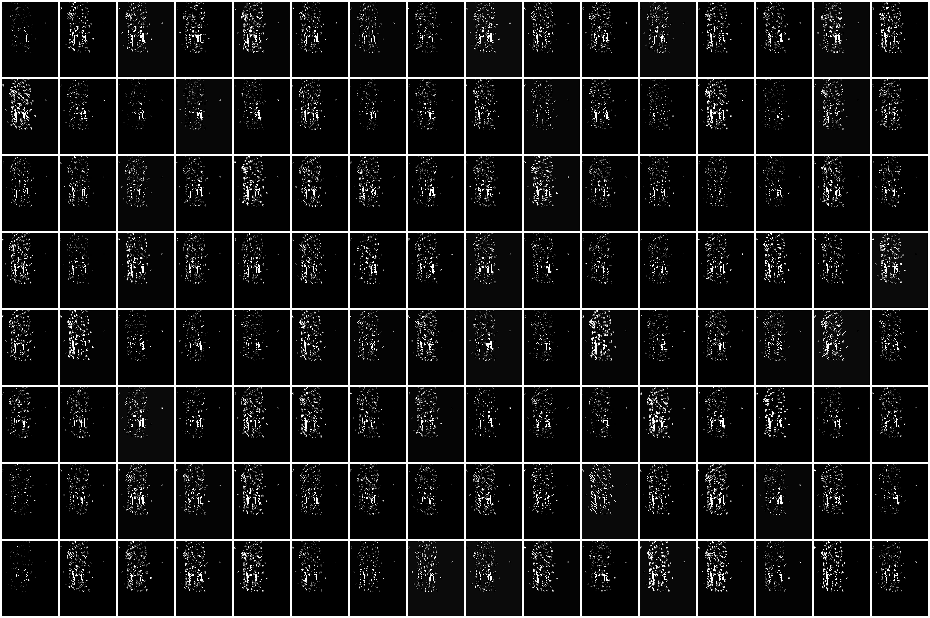

In [15]:
Image('../../featuremaps/b3c1.png')

In [16]:
data = numpy.load('../../featuremaps/block4_conv1.npy')[0]
print data.shape

(256, 1, 19, 14)


In [17]:
border=2
n_wide=8
n_tall = len(data)/n_wide
width=(n_wide)*(data[0].shape[1])+border*(n_wide+1)
height= (n_tall)*(data[0].shape[2])+border*(n_tall+1)
big_image = numpy.ndarray(shape=(3,width,height ), dtype=numpy.uint8)
big_image = big_image+255
print "Big Image Shape: ", big_image.shape
print "Small Image Shape:", data[0].shape

for index, image in enumerate(data):
    image = numpy.abs(image)
    image = 255*image#/numpy.max(image)
    image = numpy.clip(image,0,255)
    buff = numpy.ndarray(shape=(3, image.shape[1], image.shape[2]))
    for i in range(3): buff[i]=image[0]
    toimage(buff.astype(numpy.uint8)).save('../../featuremaps/b4c1_{}.png'.format(index))
    x_position = index%n_wide
    y_position = index/n_wide
    
    left_edge = border*(x_position+1)+image.shape[1]*x_position
    upper_edge = border*(y_position+1)+image.shape[2]*y_position
    big_image[:,
              left_edge:left_edge+image.shape[1],
              upper_edge:upper_edge+image.shape[2]] = buff
toimage(big_image).save('../../featuremaps/b4c1.png')

Big Image Shape:  (3, 170, 514)
Small Image Shape: (1, 19, 14)


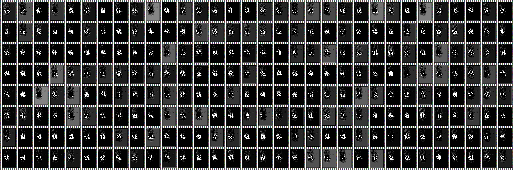

In [18]:
Image('../../featuremaps/b4c1.png')

In [19]:
data = numpy.load('../../featuremaps/block5_conv1.npy')[0]
print data.shape

(512, 1, 5, 3)


In [20]:
border=2
n_wide=8
n_tall = len(data)/n_wide
width=(n_wide)*(data[0].shape[1])+border*(n_wide+1)
height= (n_tall)*(data[0].shape[2])+border*(n_tall+1)
big_image = numpy.ndarray(shape=(3,width,height ), dtype=numpy.uint8)
big_image = big_image+255
print "Big Image Shape: ", big_image.shape
print "Small Image Shape:", data[0].shape

for index, image in enumerate(data):
    image = numpy.abs(image)
    image = 255*image#/numpy.max(image)
    image = numpy.clip(image,0,255)
    buff = numpy.ndarray(shape=(3, image.shape[1], image.shape[2]))
    for i in range(3): buff[i]=image[0]
    toimage(buff.astype(numpy.uint8)).save('../../featuremaps/b5c1_{}.png'.format(index))
    x_position = index%n_wide
    y_position = index/n_wide
    
    left_edge = border*(x_position+1)+image.shape[1]*x_position
    upper_edge = border*(y_position+1)+image.shape[2]*y_position
    big_image[:,
              left_edge:left_edge+image.shape[1],
              upper_edge:upper_edge+image.shape[2]] = buff
toimage(big_image).save('../../featuremaps/b5c1.png')

Big Image Shape:  (3, 58, 322)
Small Image Shape: (1, 5, 3)


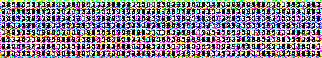

In [23]:
Image('../../featuremaps/b5c1.png')